# Quiz 2 (Deep Learning)

**Waktu**: 120 menit

**Tujuan**: Melakukan evaluasi terhadap pemahaman mengenai Machine Learning

Gunakan library Tensorflow untuk memecahkan masalah dibawah! 

Jelaskan hal-hal berikut:
  1. Yang dilakukan ketika feature engineering
  2. Susunan neural network yang dipakai
  3. Hyperparameter yang dipakai
  4. Hasil terbaik yang didapat
  5. Hasil interpretasi grafik loss

1. Lakukan prediksi terhadap dataset CIFAR-10!

  **Hint**: Gunakan function load_data seperti berikut untuk mendapatkan training & validation set (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)



#Nomor 1

In [155]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from skimage import feature
from imutils import paths
import numpy as np
import cv2 as cv
import os
import pandas as pd
from google.colab.patches import cv2_imshow

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


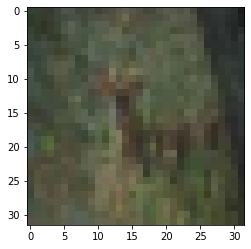

In [156]:
(feature_train, label_train), (feature_test, label_test) = tf.keras.datasets.cifar10.load_data()
print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[10], cmap=plt.get_cmap('gray'))

In [157]:
print(feature_train.shape) #untuk mengembalikan nilai shape list berupa integer yang menunjukan panjang dimensi list

(50000, 32, 32, 3)


In [158]:
def preprocess(image, image_size=128):
		image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Ubah mehjadi grayscale
		image = cv.resize(image, (image_size, image_size)) # Resize gambar menjadi suatu ukuran (default = 128)
		image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] # Melakukan thresholding dan mengambil hasil gambar thresholding
		return image

##Feature Engineering

In [159]:
feature_train = feature_train.reshape((feature_train.shape[0], 32, 32, 3)) #32 merupakan size, dan 3 merupakan dimensi
feature_test = feature_test.reshape((feature_test.shape[0], 32, 32, 3))

In [160]:
from tensorflow.keras.utils import to_categorical

label_train = to_categorical(label_train)           #mengkategorikan label train dengan 0 dan 1
label_test = to_categorical(label_test)             #mengkategorikan label test dengan 0 dan 1

print(label_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [161]:
feature_train = feature_train.astype('float32') #mengubah data type ke float
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0 #Normalisasi data agar data bernilai dari 0 hingga 1
feature_test = feature_test / 255.0

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

##Deeper CNN

In [163]:
deeper_model = Sequential()
deeper_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3))) # Convolution, 32 filters, masing-masing dengan kernel 3x3
deeper_model.add(MaxPooling2D((2, 2))) # Pooling
deeper_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
deeper_model.add(MaxPooling2D((2, 2))) # Pooling

deeper_model.add(Flatten()) # Flatten hasil output

# Fully connected layer
deeper_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
deeper_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.001, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

deeper_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function
deeper_model.summary()

history_cnn = deeper_model.fit(feature_train, label_train, batch_size=128, validation_data=(feature_test, label_test), epochs=50)

loss, accuracy = deeper_model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)



Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 100)               230500    
_________________________________________________________________
dense_71 (Dense)             (None, 10)              

In [164]:
history_dataframec = pd.DataFrame(history_cnn.history)
history_dataframec['epoch'] = history_cnn.epoch
history_dataframec
history_dataframec.sort_values(by='val_accuracy', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.977478,0.28760,1.772544,0.3786,0
1,1.694971,0.39822,1.610626,0.4305,1
2,1.557232,0.44774,1.548215,0.4526,2
3,1.467920,0.47778,1.422916,0.4980,3
4,1.390985,0.50572,1.375577,0.5120,4
5,1.335903,0.52868,1.335754,0.5262,5
6,1.289837,0.54486,1.281009,0.5417,6
7,1.249939,0.55928,1.272959,0.5544,7
9,1.180624,0.58598,1.222639,0.5639,9
8,1.211780,0.57500,1.218320,0.5707,8


In [165]:
def plot_loss(hstr):
  plt.plot(hstr.history['loss'], label='loss')
  plt.plot(hstr.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

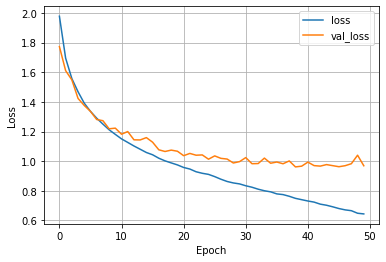

In [166]:
plot_loss(history_cnn)

nilai akurasi terbaik didapat pada epoch ke 49 dengan nilai 0.67 serta val_loss 0.96 dan loss 0.77

#Nomor 2

2. Lakukan prediksi terhadap dataset `ionosphere_data_kaggle.csv`. 

  **Catatan**: 
  
  - Split dataset menggunakan library scikit-learn dengan perbandingan 80:20 dan random_state=10.

  - Hasil prediksi dapat ditemui di kolom *label*.

  - Penjelasan dataset: https://archive.ics.uci.edu/ml/datasets/Ionosphere

In [115]:
dataset = pd.read_csv('/content/drive/My Drive/dataset_quiz/ionosphere_data_kaggle.csv')

##Data Cleaning and Feature Engineering

In [116]:
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [117]:
dataset.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
dataset["label"].value_counts() #menghitung total g dan b pada feature label

g    225
b    126
Name: label, dtype: int64

In [119]:
cleanup_label = {"label":     {"g": 0, "b": 1}} 

dataset.replace(cleanup_label, inplace=True) #mengganti label g dan b ke 0 dan 1
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [123]:
#karena features 2 nilainya 0 semua, dilihat dari dataset.describe(), maka saya mendrop feature 2
dataset=dataset.drop(['feature2'], axis=1)

In [167]:
dataset.columns

Index(['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7',
       'feature8', 'feature9', 'feature10', 'feature11', 'feature12',
       'feature13', 'feature14', 'feature15', 'feature16', 'feature17',
       'feature18', 'feature19', 'feature20', 'feature21', 'feature22',
       'feature23', 'feature24', 'feature25', 'feature26', 'feature27',
       'feature28', 'feature29', 'feature30', 'feature31', 'feature32',
       'feature33', 'feature34', 'label'],
      dtype='object')

In [168]:
label2 = dataset['label']
features2 = dataset.drop(['label'], axis=1) #menentukan prediksi menggunakan fitur label

In [169]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() #menggunakan preprocesing standar scaler

features2 = scaler.fit_transform(features2.values)
label2 = scaler.fit_transform(label2.values.reshape(-1,1)).flatten() #nilai label di flatten

In [170]:
from sklearn.model_selection import train_test_split
feature_train2, feature_test2, label_train2, label_test2 = train_test_split(features2, label2, test_size=0.2, random_state=10) #perbandingan test dan train 80:20

##Linear Regression

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lm2 = LinearRegression()
lm2.fit(feature_train2, label_train2)

predictions2 = lm2.predict(feature_test2)

mse2 = mean_squared_error(label_test2, predictions2)
mae2 = mean_absolute_error(label_test2, predictions2)
r22 = r2_score(label_test2, predictions2)
print("MSE (Mean Squared Error)", mse2)
print("MAE (Mean Absolute Error)", mae2)
print("r^2 score", r22)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test2, predictions2)))

MSE (Mean Squared Error) 0.5166231048008582
MAE (Mean Absolute Error) 0.489963573081488
r^2 score 0.45717445202229534
RMSE (Root Mean Squared Error 0.7187649857921977


Kesimpulan: nilai r2 score yang didapat rendah, yaitu 0.45

##Wider Model

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

wider_model2 = Sequential()
wider_model2.add(Dense(40, input_dim=33, kernel_initializer='normal', activation='relu')) #neuron pada wider 40 dan input dim sebanyak fitur yaitu 33
wider_model2.add(Dense(1, kernel_initializer='normal'))

wider_model2.compile(loss='mean_squared_error', optimizer='adam') #menggunakan optimizer adam

historyw2 = wider_model2.fit(x=feature_train2, y=label_train2, validation_data=(feature_test2, label_test2), epochs=100, batch_size=8) 

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 0.8981 - val_loss: 0.7387
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6516 - val_loss: 0.5405
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4517 - val_loss: 0.4537
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3755 - val_loss: 0.4420
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3323 - val_loss: 0.4302
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3050 - val_loss: 0.4099
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2775 - val_loss: 0.3980
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2602 - val_loss: 0.3844
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2440 - val_loss: 0.3758
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2360 - val_loss: 0.3643
Epoch 11/

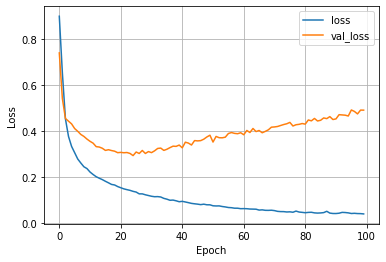

In [173]:
plot_loss(historyw2)

Kesimpulan: pada grafik val loss yang stabil berada di sekitaran epoch 18 dengan nilai loss: 0.16 dan val_loss: 0.31

##Deeper Model

In [174]:
deeper_model2 = Sequential()
deeper_model2.add(Dense(33, input_dim=33, kernel_initializer='normal', activation='relu'))
deeper_model2.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model2.add(Dense(1, kernel_initializer='normal'))

deeper_model2.compile(loss='mean_squared_error', optimizer='adam')

historyd2 = deeper_model2.fit(x=feature_train2, y=label_train2, validation_data=(feature_test2, label_test2), epochs=100, batch_size=8)

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 0.9946 - val_loss: 0.9169
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.9210 - val_loss: 0.8132
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7398 - val_loss: 0.6275
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4875 - val_loss: 0.4843
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3602 - val_loss: 0.4507
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3083 - val_loss: 0.4265
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2771 - val_loss: 0.4134
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2537 - val_loss: 0.3902
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2339 - val_loss: 0.3919
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2189 - val_loss: 0.3602
Epoch 11/

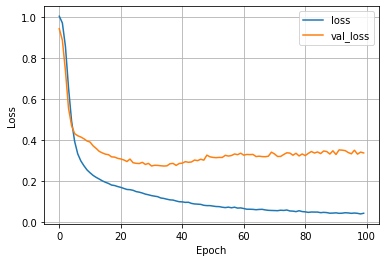

In [79]:
plot_loss(historyd)

berdasarkan diagram, val_los yang lumayan stabil berada pada kisaran epoch 30 - 35

Untuk deeper, val_loss terendah sekitar 0.24 dan loss 0.08

##Mencari nilai terbaik berdasarkan optimizer

###Wider Model

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import RMSprop

opt_sgd=SGD(lr=0.01, momentum=0.9)
opt_Adadelta=Adadelta(lr=0.001, rho=0.95, epsilon=1e-07)
opt_Adamax=Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
opt_RMSprop=RMSprop(lr=0.001,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)

def wide_opt2(optim):
  wider_model2 = Sequential()
  wider_model2.add(Dense(40, input_dim=33, kernel_initializer='normal', activation='relu')) #neuron pada wider 40 dan input dim sebanyak fitur yaitu 33
  wider_model2.add(Dense(1, kernel_initializer='normal'))
  opt=optim
  wider_model2.compile(loss='mean_squared_error', optimizer=opt) #menggunakan optimizer adam

  historyw2 = wider_model2.fit(x=feature_train2, y=label_train2, validation_data=(feature_test2, label_test2), epochs=1000, batch_size=8) 
  plot_loss(historyw2)

####SGD

Epoch 1/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.7285 - val_loss: 0.5388
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4317 - val_loss: 0.4541
Epoch 3/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2941 - val_loss: 0.3940
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2400 - val_loss: 0.4013
Epoch 5/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2055 - val_loss: 0.3648
Epoch 6/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2241 - val_loss: 0.2915
Epoch 7/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1989 - val_loss: 0.3412
Epoch 8/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1538 - val_loss: 0.3112
Epoch 9/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1462 - val_loss: 0.3228
Epoch 10/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1354 - val_loss: 0.2907

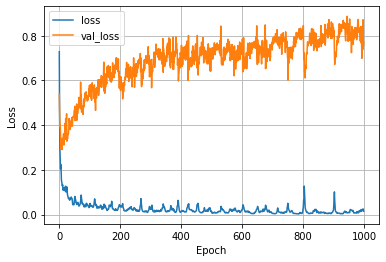

In [210]:
wide_opt2(opt_sgd)

####Adamax

Epoch 1/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.9229 - val_loss: 0.8527
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.8299 - val_loss: 0.7805
Epoch 3/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.7449 - val_loss: 0.7077
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.6613 - val_loss: 0.6381
Epoch 5/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.5826 - val_loss: 0.5821
Epoch 6/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.5177 - val_loss: 0.5403
Epoch 7/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4689 - val_loss: 0.5110
Epoch 8/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4311 - val_loss: 0.4917
Epoch 9/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4009 - val_loss: 0.4776
Epoch 10/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.3767 - val_loss: 0.4701

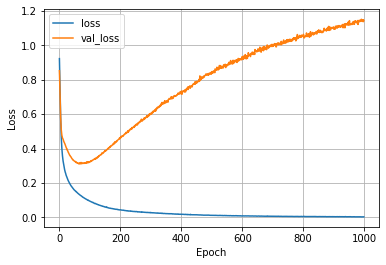

In [211]:
wide_opt2(opt_Adamax)

####Adadelta

Epoch 1/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.0150 - val_loss: 0.9807
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0147 - val_loss: 0.9804
Epoch 3/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0145 - val_loss: 0.9802
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0142 - val_loss: 0.9800
Epoch 5/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0139 - val_loss: 0.9797
Epoch 6/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0137 - val_loss: 0.9795
Epoch 7/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0134 - val_loss: 0.9793
Epoch 8/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0132 - val_loss: 0.9791
Epoch 9/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0130 - val_loss: 0.9789
Epoch 10/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.0127 - val_loss: 0.9786

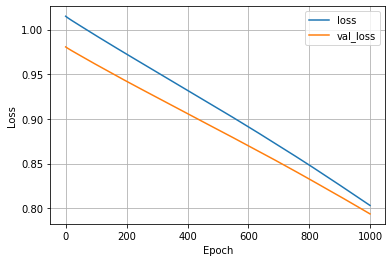

In [212]:
wide_opt2(opt_Adadelta)

####RMSprop

Epoch 1/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.8108 - val_loss: 0.6611
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.5568 - val_loss: 0.5025
Epoch 3/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4233 - val_loss: 0.4589
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.3652 - val_loss: 0.4446
Epoch 5/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.3264 - val_loss: 0.4364
Epoch 6/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2988 - val_loss: 0.4215
Epoch 7/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2776 - val_loss: 0.4027
Epoch 8/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2570 - val_loss: 0.3931
Epoch 9/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2466 - val_loss: 0.3755
Epoch 10/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2320 - val_loss: 0.3721

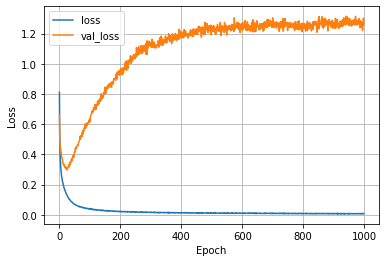

In [213]:
wide_opt2(opt_RMSprop)

Nilai terbaik yang didapat adalah menggunakan optimizer SGD dengan val_loss sebesar 0.29 dan loss 0.22 pada epoch ke 6

#Nomor 3

3. Lakukan prediksi terhadap dataset `titanic_train.csv` dan `titanic_eval.csv`. Gunakan file `titanic_train.csv` untuk training dan `titanic_eval.csv` sebagai validation set!

  - Hasil prediksi dapat ditemui di kolom *survived*.
  - Penjelasan dataset: https://www.kaggle.com/c/titanic/data?select=train.csv

##Data Cleaning and Feature Engineering

In [87]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
dataset3_train = pd.read_csv('/content/drive/My Drive/dataset_quiz/titanic_train.csv')
dataset3_test = pd.read_csv('/content/drive/My Drive/dataset_quiz/titanic_eval.csv')
dataset3_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [89]:
dataset3_train.replace("?", np.nan, inplace=True)
dataset3_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [92]:
dataset3_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [94]:
dataset3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [97]:
cleanup_data = {'sex':{'male': 1,'female' : 0},'alone':{'y':1,'n':0}}

dataset3_train.replace(cleanup_data, inplace=True)

In [99]:
dataset3_test.replace(cleanup_data, inplace=True)

In [101]:
dataset3_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22.0,1,0,7.2500,Third,unknown,Southampton,0
1,1,0,38.0,1,0,71.2833,First,C,Cherbourg,0
2,1,0,26.0,0,0,7.9250,Third,unknown,Southampton,1
3,1,0,35.0,1,0,53.1000,First,C,Southampton,0
4,0,1,28.0,0,0,8.4583,Third,unknown,Queenstown,1


In [100]:
dataset3_test.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,35.0,0,0,8.0500,Third,unknown,Southampton,1
1,0,1,54.0,0,0,51.8625,First,E,Southampton,1
2,1,0,58.0,0,0,26.5500,First,C,Southampton,1
3,1,0,55.0,0,0,16.0000,Second,unknown,Southampton,1
4,1,1,34.0,0,0,13.0000,Second,D,Southampton,1


In [102]:
dataset3_train.drop(['deck','embark_town'], axis=1, inplace=True)
dataset3_test.drop(['deck','embark_town'], axis=1, inplace=True)
dataset3_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,alone
0,0,1,22.0,1,0,7.2500,Third,0
1,1,0,38.0,1,0,71.2833,First,0
2,1,0,26.0,0,0,7.9250,Third,1
3,1,0,35.0,1,0,53.1000,First,0
4,0,1,28.0,0,0,8.4583,Third,1


In [103]:
dataset3_test.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,alone
0,0,1,35.0,0,0,8.0500,Third,1
1,0,1,54.0,0,0,51.8625,First,1
2,1,0,58.0,0,0,26.5500,First,1
3,1,0,55.0,0,0,16.0000,Second,1
4,1,1,34.0,0,0,13.0000,Second,1


In [104]:
dataset3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    int64  
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   alone               627 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 39.3+ KB


In [108]:
class_categorized_train = pd.get_dummies(dataset3_train['class'])
class_categorized_train

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
622,0,1,0
623,0,0,1
624,1,0,0
625,0,0,1


In [107]:
class_categorized_test = pd.get_dummies(dataset3_test['class'])
class_categorized_test

,First,Second,Third
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
259,0,1,0
260,0,0,1
261,0,0,1
262,0,1,0


In [109]:
dataset3_train = pd.concat([dataset3_train, class_categorized_train], axis=1)

dataset3_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,alone,First,Second,Third
0,0,1,22.0,1,0,7.2500,Third,0,0,0,1
1,1,0,38.0,1,0,71.2833,First,0,1,0,0
2,1,0,26.0,0,0,7.9250,Third,1,0,0,1
3,1,0,35.0,1,0,53.1000,First,0,1,0,0
4,0,1,28.0,0,0,8.4583,Third,1,0,0,1


In [110]:
dataset3_test = pd.concat([dataset3_test, class_categorized_test], axis=1)

dataset3_test.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,alone,First,Second,Third
0,0,1,35.0,0,0,8.0500,Third,1,0,0,1
1,0,1,54.0,0,0,51.8625,First,1,1,0,0
2,1,0,58.0,0,0,26.5500,First,1,1,0,0
3,1,0,55.0,0,0,16.0000,Second,1,0,1,0
4,1,1,34.0,0,0,13.0000,Second,1,0,1,0


In [111]:
dataset3_train.drop(['class'], axis=1, inplace=True)
dataset3_test.drop(['class'], axis=1, inplace=True)

In [112]:
dataset3_test.head()

,survived,sex,age,n_siblings_spouses,parch,fare,alone,First,Second,Third
0,0,1,35.0,0,0,8.0500,1,0,0,1
1,0,1,54.0,0,0,51.8625,1,1,0,0
2,1,0,58.0,0,0,26.5500,1,1,0,0
3,1,0,55.0,0,0,16.0000,1,0,1,0
4,1,1,34.0,0,0,13.0000,1,0,1,0


In [113]:
dataset3_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,alone,First,Second,Third
0,0,1,22.0,1,0,7.2500,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,1,0,0
2,1,0,26.0,0,0,7.9250,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,0
4,0,1,28.0,0,0,8.4583,1,0,0,1


In [114]:
dataset3_train.info()
# dataset3_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    int64  
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   alone               627 non-null    int64  
 7   First               627 non-null    uint8  
 8   Second              627 non-null    uint8  
 9   Third               627 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 36.3 KB


In [147]:
label_train3 = dataset3_train['survived']
feature_train3 = dataset3_train.drop(['survived'], axis=1)
label_test3 = dataset3_test['survived']
feature_test3 = dataset3_test.drop(['survived'], axis=1)

In [148]:
from sklearn import preprocessing
scaler3 = preprocessing.StandardScaler()

feature_train3 = scaler3.fit_transform(feature_train3.values)
feature_test3 = scaler3.fit_transform(feature_test3.values)
label_train3 = scaler3.fit_transform(label_train3.values.reshape(-1,1)).flatten()
label_test3 = scaler3.fit_transform(label_test3.values.reshape(-1,1)).flatten()

##Wider Model

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(40, input_dim=9, kernel_initializer='normal', activation='relu')) # 13 neuron input_dim=feature=9
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='SGD')

history2w=model.fit(x=feature_train3, y=label_train3, validation_data=(feature_test3, label_test3), epochs=100, batch_size=8)

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.9413 - val_loss: 0.8782
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.7910 - val_loss: 0.7384
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6425 - val_loss: 0.6619
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5821 - val_loss: 0.6423
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5622 - val_loss: 0.6379
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5556 - val_loss: 0.6354
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5530 - val_loss: 0.6314
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5491 - val_loss: 0.6272
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5484 - val_loss: 0.6309
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5479 - val_loss: 0.6291
Epoch 11/

Nilai val_loss terbaik yg didapat berada pada epoch 93 dengan loss: 0.49 dan val_loss: 0.57

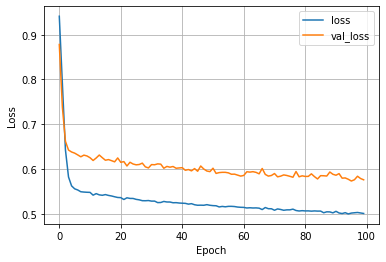

In [150]:
plot_loss(history2w)

##Deeper Model

In [152]:
deeper_model3 = Sequential()
deeper_model3.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
deeper_model3.add(Dense(5, kernel_initializer='normal', activation='relu'))
deeper_model3.add(Dense(1, kernel_initializer='normal'))

deeper_model3.compile(loss='mean_squared_error', optimizer='adam')

historyd3 = deeper_model3.fit(x=feature_train3, y=label_train3, validation_data=(feature_test3, label_test3), epochs=100, batch_size=8)

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.9939 - val_loss: 0.9789
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.9206 - val_loss: 0.8487
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.7495 - val_loss: 0.7161
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6230 - val_loss: 0.6541
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5720 - val_loss: 0.6293
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5566 - val_loss: 0.6234
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5507 - val_loss: 0.6218
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5467 - val_loss: 0.6197
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5449 - val_loss: 0.6196
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5439 - val_loss: 0.6178
Epoch 11/

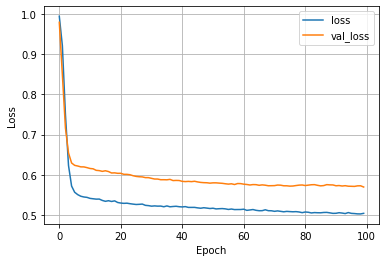

In [153]:
plot_loss(historyd3)

berdasarkan grafik, val_loss mulai stabil mada epoch ke 70 hingga seratus, dengan rata rata nilai val_loss=0.57 dan loss=0.50

##Mencari nilai terbaik berdasarkan optimizer

###Wider Model

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import RMSprop

opt_sgd=SGD(lr=0.01, momentum=0.9)
opt_Adadelta=Adadelta(lr=0.001, rho=0.95, epsilon=1e-07)
opt_Adamax=Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
opt_RMSprop=RMSprop(lr=0.001,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)

def wide_opt3(optim):
  wider_model3 = Sequential()
  wider_model3.add(Dense(40, input_dim=9, kernel_initializer='normal', activation='relu')) #menggunakan neuron 40, input_dim=features=9
  wider_model3.add(Dense(1, kernel_initializer='normal'))

  opt=optim
  wider_model3.compile(loss='mean_squared_error', optimizer=opt)

  historyw3 = wider_model3.fit(x=feature_train3, y=label_train3, validation_data=(feature_test3, label_test3), epochs=1000, batch_size=8)

  plot_loss(historyw3)


####SGD

Epoch 1/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.7516 - val_loss: 0.6904
Epoch 2/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5958 - val_loss: 0.6299
Epoch 3/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5696 - val_loss: 0.6320
Epoch 4/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5733 - val_loss: 0.6297
Epoch 5/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5675 - val_loss: 0.6238
Epoch 6/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5755 - val_loss: 0.6108
Epoch 7/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5767 - val_loss: 0.6281
Epoch 8/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5680 - val_loss: 0.6025
Epoch 9/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5814 - val_loss: 0.6072
Epoch 10/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5513 - val_loss: 0.5731

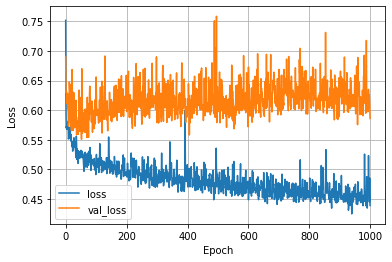

In [215]:
wide_opt3(opt_sgd)

####Adamax

Epoch 1/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9389 - val_loss: 0.8971
Epoch 2/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.8419 - val_loss: 0.8056
Epoch 3/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.7377 - val_loss: 0.7243
Epoch 4/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.6544 - val_loss: 0.6779
Epoch 5/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.6058 - val_loss: 0.6574
Epoch 6/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5810 - val_loss: 0.6476
Epoch 7/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5684 - val_loss: 0.6429
Epoch 8/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5611 - val_loss: 0.6402
Epoch 9/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5578 - val_loss: 0.6389
Epoch 10/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5544 - val_loss: 0.6380

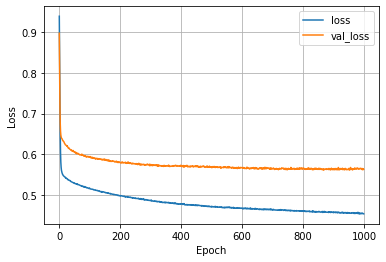

In [216]:
wide_opt3(opt_Adamax)

####Adadelta

Epoch 1/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0141 - val_loss: 1.0126
Epoch 2/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0139 - val_loss: 1.0125
Epoch 3/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0137 - val_loss: 1.0123
Epoch 4/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0136 - val_loss: 1.0121
Epoch 5/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0134 - val_loss: 1.0119
Epoch 6/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0132 - val_loss: 1.0118
Epoch 7/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0130 - val_loss: 1.0116
Epoch 8/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0128 - val_loss: 1.0114
Epoch 9/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0126 - val_loss: 1.0113
Epoch 10/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0125 - val_loss: 1.0111

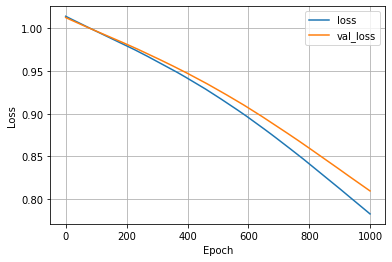

In [217]:
wide_opt3(opt_Adadelta)

####RMSprop

Epoch 1/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8797 - val_loss: 0.7852
Epoch 2/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.6769 - val_loss: 0.6737
Epoch 3/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5879 - val_loss: 0.6417
Epoch 4/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5613 - val_loss: 0.6392
Epoch 5/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5514 - val_loss: 0.6345
Epoch 6/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5484 - val_loss: 0.6256
Epoch 7/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5463 - val_loss: 0.6208
Epoch 8/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5428 - val_loss: 0.6237
Epoch 9/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5434 - val_loss: 0.6194
Epoch 10/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5388 - val_loss: 0.6230

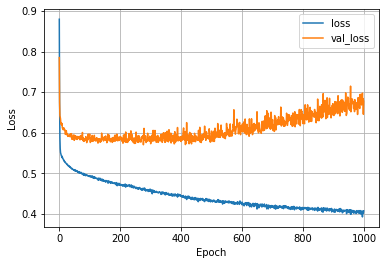

In [218]:
wide_opt3(opt_RMSprop)

untuk wide model hasil val_loss dan loss sudah mulai stabil dari epoch ke 600 menggunakan optimizer adamax dengan val_loss 0.56 dan loss 0.45

###Deeper Model

In [219]:
def deep_mode3(optim): 
  deeper_model3 = Sequential()
  deeper_model3.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
  deeper_model3.add(Dense(5, kernel_initializer='normal', activation='relu'))
  deeper_model3.add(Dense(1, kernel_initializer='normal'))
  opt=optim
  deeper_model3.compile(loss='mean_squared_error', optimizer=opt)
  historyd3 = deeper_model3.fit(x=feature_train3, y=label_train3, validation_data=(feature_test3, label_test3), epochs=1000, batch_size=8)
  plot_loss(historyd3)

####SGD

Epoch 1/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0145 - val_loss: 0.9925
Epoch 2/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.8982 - val_loss: 0.6875
Epoch 3/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.6169 - val_loss: 0.6458
Epoch 4/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5899 - val_loss: 0.6322
Epoch 5/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5809 - val_loss: 0.6256
Epoch 6/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5647 - val_loss: 0.6411
Epoch 7/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5715 - val_loss: 0.6554
Epoch 8/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5816 - val_loss: 0.6203
Epoch 9/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5964 - val_loss: 0.6326
Epoch 10/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5509 - val_loss: 0.6007

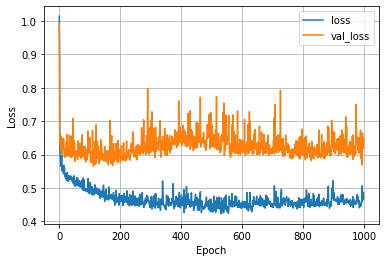

In [220]:
deep_mode3(opt_sgd)

####Adamax

Epoch 1/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9977 - val_loss: 0.9951
Epoch 2/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.9895 - val_loss: 0.9845
Epoch 3/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.9728 - val_loss: 0.9655
Epoch 4/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.9460 - val_loss: 0.9375
Epoch 5/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.9098 - val_loss: 0.9033
Epoch 6/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.8635 - val_loss: 0.8606
Epoch 7/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.8126 - val_loss: 0.8196
Epoch 8/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.7635 - val_loss: 0.7834
Epoch 9/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.7187 - val_loss: 0.7511
Epoch 10/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.6786 - val_loss: 0.7268

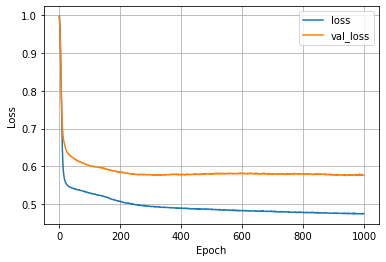

In [221]:
deep_mode3(opt_Adamax)

####Adadelta

Epoch 1/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 2/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 3/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 4/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 5/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 6/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 7/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 8/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 9/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 10/1000
79/79 [==============================] - 0s 2ms/step - loss: 1.0000 - val_loss: 1.0000

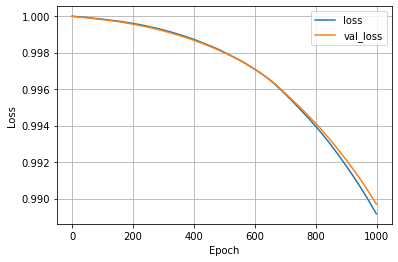

In [222]:
deep_mode3(opt_Adadelta)

####RMSprop

Epoch 1/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9926 - val_loss: 0.9766
Epoch 2/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.9353 - val_loss: 0.8945
Epoch 3/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.8183 - val_loss: 0.7825
Epoch 4/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.6893 - val_loss: 0.6916
Epoch 5/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.6066 - val_loss: 0.6477
Epoch 6/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5691 - val_loss: 0.6342
Epoch 7/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.5576 - val_loss: 0.6240
Epoch 8/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5522 - val_loss: 0.6217
Epoch 9/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5483 - val_loss: 0.6186
Epoch 10/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.5434 - val_loss: 0.6226

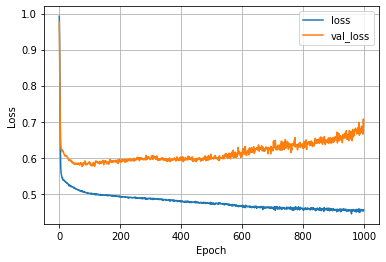

In [223]:
deep_mode3(opt_RMSprop)

untuk deeper model, val_loss sudah mulai stabil pada epoch ke 300 dengan kisaran nilai val_loss 0.56 dan loss 0.50

#Nomor 4

4. Lakukan prediksi terhadap dataset `winequality-white.csv`.
  - Split dataset menggunakan library scikit-learn dengan perbandingan 80:20 dan random_state=10.
  - Hasil prediksi dapat ditemui di kolom *quality*.
  - Penjelasan dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [175]:
dataset4 = pd.read_csv('/content/drive/My Drive/dataset_quiz/winequality-white.csv', sep=';') #tabular dipisah menggunakan ';'

##Feature Engineering

In [176]:
dataset4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [177]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##Linear Regression

In [178]:
label4 = dataset4['quality']
features4 = dataset4.drop(['quality'], axis=1)

from sklearn import preprocessing
scaler4 = preprocessing.StandardScaler()

features4 = scaler4.fit_transform(features4.values)
label4 = scaler4.fit_transform(label4.values.reshape(-1,1)).flatten()

from sklearn.model_selection import train_test_split
feature_train4, feature_test4, label_train4, label_test4 = train_test_split(features4, label4, test_size=0.2, random_state=10) #perbandingan train dan test 80:20

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lm4 = LinearRegression()
lm4.fit(feature_train4, label_train4)

predictions4 = lm4.predict(feature_test4)

mse4 = mean_squared_error(label_test4, predictions4)
mae4 = mean_absolute_error(label_test4, predictions4)
r24 = r2_score(label_test4, predictions4)
print("MSE (Mean Squared Error)", mse4)
print("MAE (Mean Absolute Error)", mae4)
print("r^2 score", r24)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test4, predictions4)))

MSE (Mean Squared Error) 0.7059920630290911
MAE (Mean Absolute Error) 0.6532309508687619
r^2 score 0.2742868892098229
RMSE (Root Mean Squared Error 0.840233338441823


untuk linear regression, r2 yg didapat rendah yaitu 0.27

##Wider Model

In [232]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

wider_model4 = Sequential()
wider_model4.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu')) #menggunakan neuron 20, input_dim=features=11
wider_model4.add(Dense(1, kernel_initializer='normal'))

wider_model4.compile(loss='mean_squared_error', optimizer='adam')

historyw4 = wider_model4.fit(x=feature_train4, y=label_train4, validation_data=(feature_test4, label_test4), epochs=100, batch_size=8)


Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7992 - val_loss: 0.6705
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6823 - val_loss: 0.6510
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6664 - val_loss: 0.6417
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6531 - val_loss: 0.6396
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6464 - val_loss: 0.6368
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6378 - val_loss: 0.6296
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6354 - val_loss: 0.6287
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6300 - val_loss: 0.6274
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6283 - val_loss: 0.6263
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6270 - val_lo

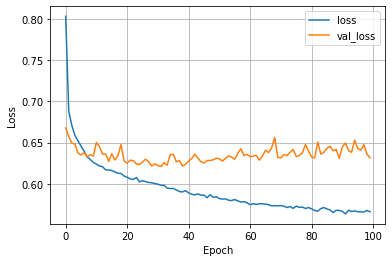

In [180]:
plot_loss(historyw4)

pada diagram, val_loss mulai stabil pada kisaran epoch 25-30

Nilai Val_loss terendah yg didapat berada pada epoch 25 dengan nilai val_loss 0.60 dan loss 0.62

##Deeper Model

In [181]:
deeper_model4 = Sequential()
deeper_model4.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu')) #menggunakan 3 layer, dengan featur = input_dim yaitu 11
deeper_model4.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model4.add(Dense(1, kernel_initializer='normal'))

deeper_model4.compile(loss='mean_squared_error', optimizer='adam')

historyd4 = deeper_model4.fit(x=feature_train4, y=label_train4, validation_data=(feature_test4, label_test4), epochs=100, batch_size=8)

Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 0.8511 - val_loss: 0.6940
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7005 - val_loss: 0.6668
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6793 - val_loss: 0.6584
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6687 - val_loss: 0.6629
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6620 - val_loss: 0.6520
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6586 - val_loss: 0.6533
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6551 - val_loss: 0.6560
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6524 - val_loss: 0.6452
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6499 - val_loss: 0.6473
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6483 - val_lo

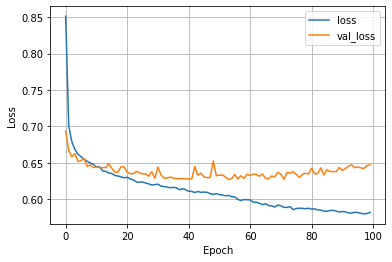

In [182]:
plot_loss(historyd4)

##Mencari nilai terbaik berdasarkan optimizer

###Wider model

In [233]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import RMSprop

opt_sgd=SGD(lr=0.01, momentum=0.9)
opt_Adadelta=Adadelta(lr=0.001, rho=0.95, epsilon=1e-07)
opt_Adamax=Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
opt_RMSprop=RMSprop(lr=0.001,rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)

def wide_opt(optim):
  wider_model4 = Sequential()
  wider_model4.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu')) #menggunakan neuron 20, input_dim=features=11
  wider_model4.add(Dense(1, kernel_initializer='normal'))

  opt=optim
  wider_model4.compile(loss='mean_squared_error', optimizer=opt)

  historyw4 = wider_model4.fit(x=feature_train4, y=label_train4, validation_data=(feature_test4, label_test4), epochs=100, batch_size=8)

  plot_loss(historyw4)


####SGD

Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7653 - val_loss: 0.7252
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7270 - val_loss: 0.6591
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7111 - val_loss: 0.7807
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7007 - val_loss: 0.6623
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6995 - val_loss: 0.6946
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6902 - val_loss: 0.6780
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6866 - val_loss: 0.6673
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6790 - val_loss: 0.6932
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6886 - val_loss: 0.7102
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6890 - val_lo

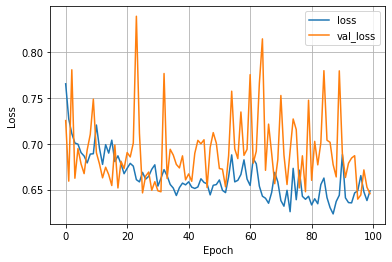

In [234]:
wide_opt(opt_sgd)

####Adamax

Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 0.9109 - val_loss: 0.7844
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7723 - val_loss: 0.7107
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7220 - val_loss: 0.6882
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7031 - val_loss: 0.6784
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6937 - val_loss: 0.6743
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6867 - val_loss: 0.6715
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6820 - val_loss: 0.6670
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6766 - val_loss: 0.6656
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6726 - val_loss: 0.6606
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6689 - val_lo

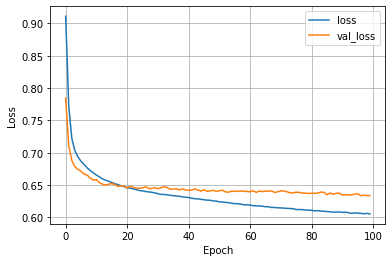

In [235]:
wide_opt(opt_Adamax)

####Adadelta

Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0046 - val_loss: 0.9698
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0042 - val_loss: 0.9694
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0037 - val_loss: 0.9689
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0033 - val_loss: 0.9685
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0028 - val_loss: 0.9681
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0024 - val_loss: 0.9676
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0020 - val_loss: 0.9672
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0015 - val_loss: 0.9668
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0011 - val_loss: 0.9663
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0007 - val_lo

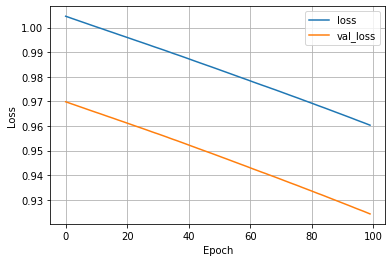

In [236]:
wide_opt(opt_Adadelta)

####RMSprop

Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7975 - val_loss: 0.6771
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6931 - val_loss: 0.6575
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6791 - val_loss: 0.6527
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6674 - val_loss: 0.6542
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6600 - val_loss: 0.6502
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6543 - val_loss: 0.6464
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6497 - val_loss: 0.6561
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6468 - val_loss: 0.6458
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6424 - val_loss: 0.6411
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6409 - val_lo

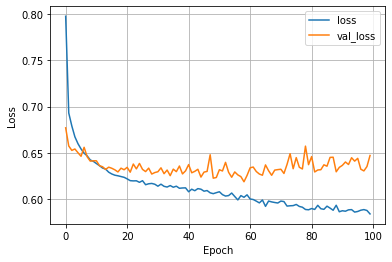

In [237]:
wide_opt(opt_RMSprop)

###Deeper Model

In [238]:
def deep_mode(optim):
  deeper_model4 = Sequential()
  deeper_model4.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu')) #menggunakan 3 layer, dengan featur = input_dim yaitu 11
  deeper_model4.add(Dense(6, kernel_initializer='normal', activation='relu'))
  deeper_model4.add(Dense(1, kernel_initializer='normal'))
  opt=optim
  deeper_model4.compile(loss='mean_squared_error', optimizer=opt)
  historyd4 = deeper_model4.fit(x=feature_train4, y=label_train4, validation_data=(feature_test4, label_test4), epochs=100, batch_size=8)
  plot_loss(historyd4)

####SGD

Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 0.9029 - val_loss: 0.7371
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7326 - val_loss: 0.7569
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7171 - val_loss: 0.6718
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7240 - val_loss: 0.6840
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7010 - val_loss: 0.8622
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7062 - val_loss: 0.6999
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6894 - val_loss: 0.6930
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6935 - val_loss: 0.6521
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6937 - val_loss: 0.6746
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6880 - val_lo

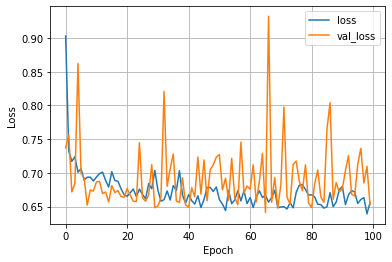

In [239]:
deep_mode(opt_sgd)

####Adamax

Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 0.9929 - val_loss: 0.9283
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 0.8902 - val_loss: 0.7949
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7861 - val_loss: 0.7172
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7344 - val_loss: 0.6885
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7084 - val_loss: 0.6787
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6963 - val_loss: 0.6743
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6889 - val_loss: 0.6688
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6837 - val_loss: 0.6646
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6794 - val_loss: 0.6621
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6754 - val_lo

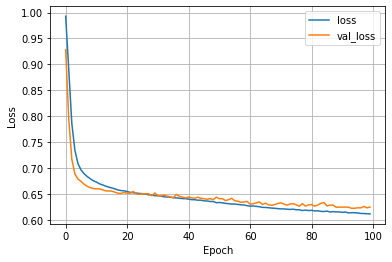

In [240]:
deep_mode(opt_Adamax)

####Adadelta

Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0063 - val_loss: 0.9744
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0063 - val_loss: 0.9744
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0063 - val_loss: 0.9744
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0063 - val_loss: 0.9744
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0062 - val_loss: 0.9744
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0062 - val_loss: 0.9743
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0062 - val_loss: 0.9743
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0062 - val_loss: 0.9743
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0062 - val_loss: 0.9743
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 1.0062 - val_lo

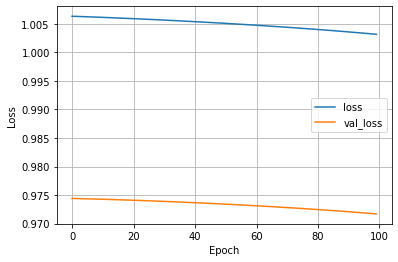

In [241]:
deep_mode(opt_Adadelta)

####RMSprop

Epoch 1/100
490/490 [==============================] - 1s 2ms/step - loss: 0.8632 - val_loss: 0.7064
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 0.7118 - val_loss: 0.6655
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6958 - val_loss: 0.6550
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6792 - val_loss: 0.6502
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6676 - val_loss: 0.6360
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6550 - val_loss: 0.6365
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6483 - val_loss: 0.6290
Epoch 8/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6424 - val_loss: 0.6353
Epoch 9/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6405 - val_loss: 0.6310
Epoch 10/100
490/490 [==============================] - 1s 2ms/step - loss: 0.6364 - val_lo

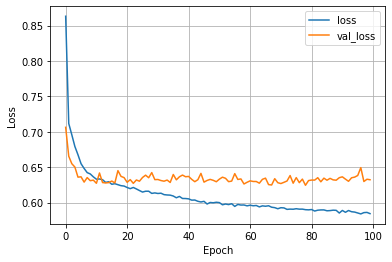

In [242]:
deep_mode(opt_RMSprop)

Jika melihat kedalam grafik, untuk deeper model, optimizer adamax adalah yang paling baik, karena grafiknya mulai menunjukan nilai yg konstan, namun masih memiliki val_los yg kurang baik di sekitar 0.62 pada epoch ke 90